# Neural network classification with tensorflow

- Binary Classification
- Multiclass classification
- Multilabel classification

# Create data to fit

In [6]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [7]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [8]:
y #Binary classification

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
circles = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'Label':y})
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


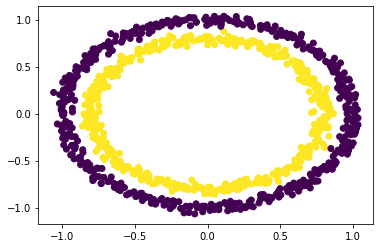

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [11]:
X[1].shape, y.shape

((2,), (1000,))

# Creating Classification tensorflow model


In [12]:
import tensorflow as tf

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 964us/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 949us/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 898us/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 994us/step - loss: 0.6937 - accuracy: 0.5157


0.48 Accuracy, thats basically guessing, lets improve

# Improving Model

1.  Model - Add more layers, add more unit in layer
2. Compile - Different optimization
3. Fitting - Train for longer

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
import numpy as np
def plotdecboundary(model, X, y):

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (predict on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  y_pred = model.predict(x_in)

  #check for multi-class
  if len(y_pred[0]) > 1:
    print('Doing multiclass classification')
    # Reshape prediction
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  
  #plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classification


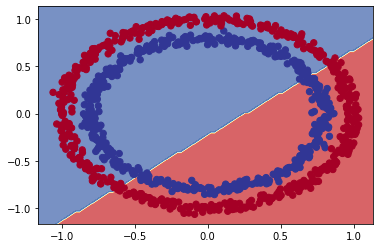

In [16]:
plotdecboundary(model_3, X, y)

Turn out our model create a straight line boundary on circular data, hence 0.5 accuracy

In [17]:
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [18]:
x_min, x_max = X[:,0].min()-0.1, X[:, 0].max()+0.1
y_min, y_max = X[:,0].min()-0.1, X[:, 0].max()+0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1595024599098636,
 1.1337117525463374)

In [19]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(x_min, x_max, 100))

In [20]:
xx

array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       ...,
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175]])

In [21]:
xx.ravel()

array([-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
        1.11054797,  1.13371175])

In [22]:
xx.shape

(100, 100)

In [23]:
x_in = np.c_[xx.ravel(), yy.ravel()]
x_in

array([[-1.15950246, -1.15950246],
       [-1.13633868, -1.15950246],
       [-1.1131749 , -1.15950246],
       ...,
       [ 1.08738419,  1.13371175],
       [ 1.11054797,  1.13371175],
       [ 1.13371175,  1.13371175]])

Can we use our model on regression problem?

In [24]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [25]:
# model_3.fit(X_reg_train, y_reg_train, epochs=100)
# will not work because its compiled for binary classification problem

In [26]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model with regression loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['mae'])

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 269.0470 - mae: 269.0470
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 154.3811 - mae: 154.3811
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 57.2730 - mae: 57.2730
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 72.9343 - mae: 72.9343
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 74.6513 - mae: 74.6513
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 51.1576 - mae: 51.1576
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 46.7825 - mae: 46.7825
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 45.3201 - mae: 45.3201
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 43.2766 - mae: 43.2766
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.0545 - mae: 42.0545
Epoch 11/100
5/5 [==============================] - 0s 

In [27]:
y_reg_pred = model_3.predict(X_reg_test)

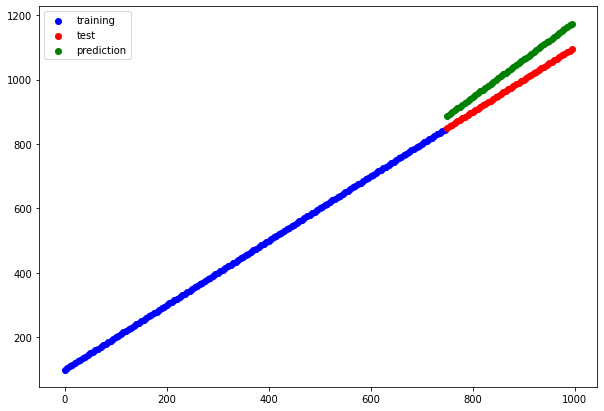

In [28]:
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='training')
plt.scatter(X_reg_test, y_reg_test, c='r', label='test')
plt.scatter(X_reg_test, y_reg_pred, c='g', label='prediction')
plt.legend()

# Non-Linearity

Sigmoid function for output layer

In [29]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid') #sigmoid for binary, softmax for multiclass
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.01), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_4.fit(X, y, epochs=25, verbose=1)

Epoch 1/25
32/32 [==============================] - 1s 1ms/step - loss: 0.6959 - accuracy: 0.4972
Epoch 2/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5475
Epoch 3/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.6004
Epoch 4/25
32/32 [==============================] - 0s 978us/step - loss: 0.6357 - accuracy: 0.7327
Epoch 5/25
32/32 [==============================] - 0s 1ms/step - loss: 0.5986 - accuracy: 0.7460
Epoch 6/25
32/32 [==============================] - 0s 1ms/step - loss: 0.5195 - accuracy: 0.8436
Epoch 7/25
32/32 [==============================] - 0s 998us/step - loss: 0.3994 - accuracy: 0.9668
Epoch 8/25
32/32 [==============================] - 0s 1ms/step - loss: 0.2753 - accuracy: 0.9932
Epoch 9/25
32/32 [==============================] - 0s 1ms/step - loss: 0.1944 - accuracy: 0.9971
Epoch 10/25
32/32 [==============================] - 0s 1ms/step - loss: 0.1319 - accuracy: 0.9981
Epoch 11/25
32/

doing binary classification


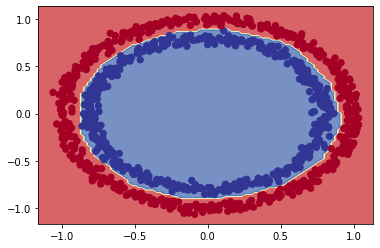

In [30]:
plotdecboundary(model_4, X, y)

In [31]:
model_4.evaluate(X, y)

32/32 [==============================] - 0s 880us/step - loss: 0.0152 - accuracy: 1.0000


[0.015227003954350948, 1.0]

## Whats Sigmoid Function ?


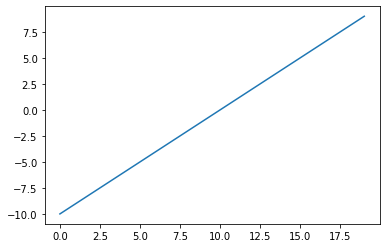

In [32]:
A = tf.cast(tf.range(-10, 10), tf.float32)
plt.plot(A)

In [33]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))

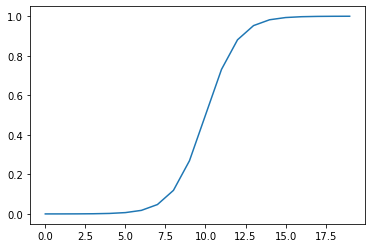

In [34]:
plt.plot(sigmoid(A))

## Whats Relu Function ?
return negative value to 0

In [35]:
def relu(x):
  return tf.maximum(x,0)

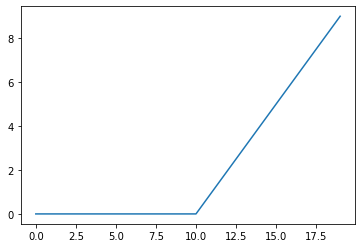

In [36]:
plt.plot(relu(A))

# MOdel Evaluation

In [37]:
y_train.shape

NameError: ignored

In [38]:
#Evaluate Model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [39]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(8, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.1),
                metrics=['accuracy'])
history_5 = model_5.fit(X_train, y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.5646
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6443 - accuracy: 0.6370
Epoch 3/10
25/25 [==============================] - 0s 979us/step - loss: 0.5943 - accuracy: 0.6780
Epoch 4/10
25/25 [==============================] - 0s 983us/step - loss: 0.5548 - accuracy: 0.7143
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 0.8130
Epoch 6/10
25/25 [==============================] - 0s 965us/step - loss: 0.3891 - accuracy: 0.8292
Epoch 7/10
25/25 [==============================] - 0s 991us/step - loss: 0.1909 - accuracy: 0.9422
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1264 - accuracy: 0.9614
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.0939 - accuracy: 0.9750
Epoch 10/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.9451


In [40]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (32, 8)                   24        
_________________________________________________________________
dense_11 (Dense)             (32, 4)                   36        
_________________________________________________________________
dense_12 (Dense)             (32, 1)                   5         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9950


[0.039700835943222046, 0.9950000047683716]

doing binary classification


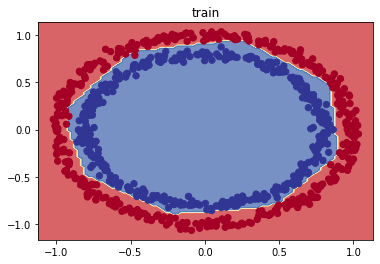

In [42]:
plt.title('train')
plotdecboundary(model_5, X_train, y_train)

doing binary classification


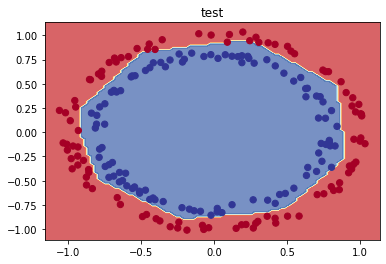

In [43]:
plt.title('test')
plotdecboundary(model_5, X_test, y_test)

In [44]:
pd.DataFrame(history_5.history)

,loss,accuracy
0,0.684535,0.58875
1,0.629717,0.64125
2,0.588910,0.67375
3,0.541525,0.72125
4,0.441561,0.81750
5,0.333744,0.86875
6,0.166732,0.95125
7,0.142434,0.94750
8,0.117241,0.96000
9,0.083793,0.96625


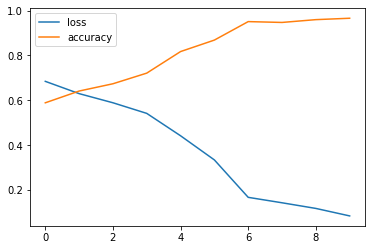

In [45]:
pd.DataFrame(history_5.history).plot()

Ideal learning process, loss going down as the learning goes on, accuracy goes up.

### Callbacks
finding ideal learning rate

In [46]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer="Adam",
                metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * (10**(epoch/20)))

history_6 = model_6.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5095
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5014
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5053
Epoch 4/100
25/25 [==============================] - 0s 916us/step - loss: 0.6933 - accuracy: 0.5189
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5089
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.5072
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5313
Epoch 8/100
25/25 [==============================] - 0s 959us/step - loss: 0.6835 - accuracy: 0.5312
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5028
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.5174
Epoch

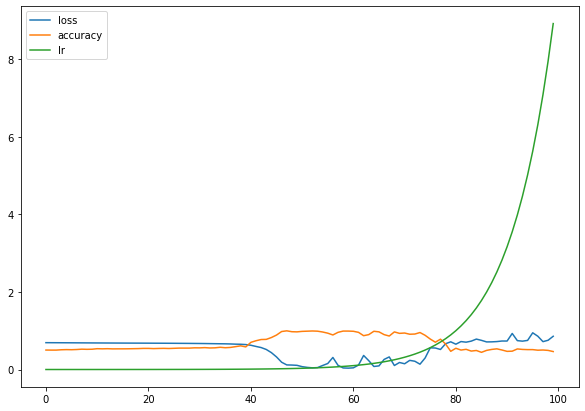

In [47]:
pd.DataFrame(history_6.history).plot(figsize=(10, 7))

In [48]:
lrs = 1e-4 * (10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

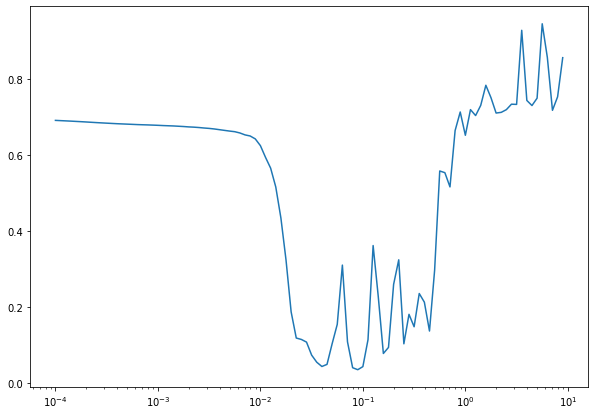

In [49]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_6.history['loss'])

In [50]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.035),
                metrics=['accuracy'])

history_7 = model_7.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.5651
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6677 - accuracy: 0.5641
Epoch 3/20
25/25 [==============================] - 0s 974us/step - loss: 0.6369 - accuracy: 0.6288
Epoch 4/20
25/25 [==============================] - 0s 953us/step - loss: 0.5681 - accuracy: 0.7486
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4807 - accuracy: 0.7689
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8883
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2151 - accuracy: 0.9482
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.1573 - accuracy: 0.9660
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.1275 - accuracy: 0.9716
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 0.9734
Epoch 11/20
25/

In [56]:
#Evaluate
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9800


[0.04305654391646385, 0.9800000190734863]

doing binary classification
doing binary classification


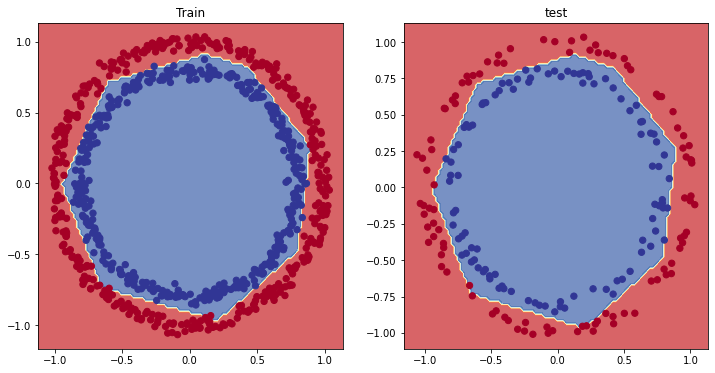

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plotdecboundary(model_7, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('test')
plotdecboundary(model_7, X_test, y_test)
plt.show()

# More Evaluation Method

other than visualizing the models result, there are other metrics and method to evaluate your models :

- Accuracy (the most common metrics, overall performance of your model, used on multiclass classification)
- Recall (better recall mean less false negative, trade off with Precision)
- Precision (better precision mean less false positive, trade off with Recall)
- F1-Score (combination of precision and recall: 2((precision*recall)/(precision+recall)
- Confusion Matrix
- Classification report

---



In [62]:
loss, accuracy = model_7.evaluate(X_test, y_test)
print(f"Model loss :{loss}")
print(f"Model acc :{accuracy:.2%}")

7/7 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9800
Model loss :0.04305654391646385
Model acc :98.00%


### Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix

In [72]:
y_pred = model_7.predict(X_test)

In [75]:
confusion_matrix(y_test, tf.round(y_pred))

array([[ 96,   4],
       [  0, 100]])

In [76]:
import itertools

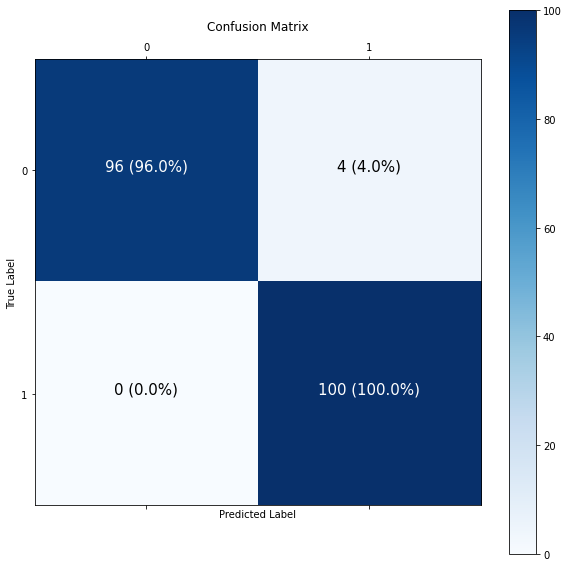

In [84]:
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

figsize = (10,10)
fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title='Confusion Matrix',
       xlabel='Predicted Label',
       ylabel='True Label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)


threshold = (cm.max() +cm.min()) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Multi-class classification 
when its more than 2 class, its a multi class classification

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(f"Training Sample:\n{train_data[0]}\n")
print(f"Training Label:\n{train_labels[0]}\n")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [28]:
#check shape of single sample
train_data[0].shape, train_labels[0]

((28, 28), 9)

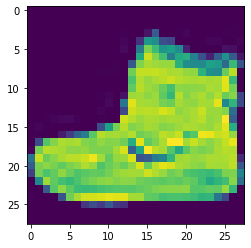

In [6]:
#plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [8]:
#decode label as readable word
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
len(train_data)

60000

Text(0.5, 1.0, 'Bag')

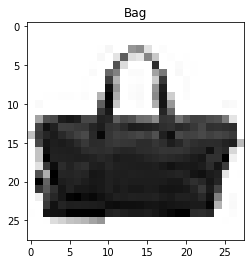

In [20]:
import random
index = random.randint(0,len(train_data))
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

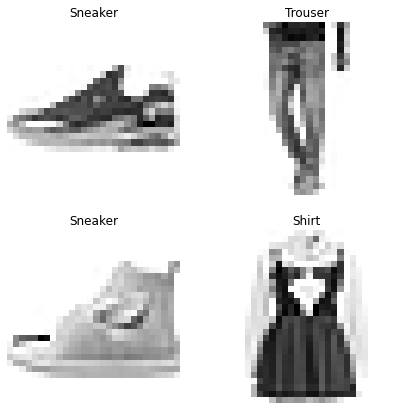

In [22]:
plt.figure(figsize =(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [38]:
input_shape = train_data[0].shape
output_shape = len(class_names)
input_shape, output_shape

((28, 28), 10)

In [52]:
# Build

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=input_shape),
                               tf.keras.layers.Dense(16, activation='relu'),
                               tf.keras.layers.Dense(8, activation='relu'),
                               tf.keras.layers.Dense(output_shape, activation=tf.keras.activations.softmax)
])

model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(), #label must be one-hot encoded, if not u can use SparseCategoricalEntropy
                optimizer=tf.keras.optimizers.Adam(0.0003),
                metrics=['accuracy'])

nonorm_history8 = model_8.fit(train_data,
            tf.one_hot(train_labels, depth=10), 
            epochs = 20, 
            validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5593 - accuracy: 0.2427 - val_loss: 1.5210 - val_accuracy: 0.4220
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4043 - accuracy: 0.4631 - val_loss: 1.1716 - val_accuracy: 0.5577
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1303 - accuracy: 0.5494 - val_loss: 1.0642 - val_accuracy: 0.5697
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0334 - accuracy: 0.5795 - val_loss: 0.9944 - val_accuracy: 0.5873
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9342 - accuracy: 0.6194 - val_loss: 0.8807 - val_accuracy: 0.6695
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8263 - accuracy: 0.6952 - val_loss: 0.7996 - val_accuracy: 0.6946
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7453 - accuracy: 0.7226 - val_loss: 0.7690 - val_accuracy:

### Try normalize the data

In [44]:
train_data_norm = train_data / 255
test_data_norm = test_data / 255

In [51]:
# Build

tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=input_shape),
                               tf.keras.layers.Dense(16, activation='relu'),
                               tf.keras.layers.Dense(8, activation='relu'),
                               tf.keras.layers.Dense(output_shape, activation=tf.keras.activations.softmax)
])

model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), #label must be one-hot encoded, if not u can use SparseCategoricalEntropy
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'])

norm_history9 = model_9.fit(train_data_norm,
            train_labels, 
            epochs = 10, 
            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9972 - accuracy: 0.6422 - val_loss: 0.5199 - val_accuracy: 0.8210
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4773 - accuracy: 0.8339 - val_loss: 0.5620 - val_accuracy: 0.8081
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4444 - accuracy: 0.8411 - val_loss: 0.4947 - val_accuracy: 0.8158
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4177 - accuracy: 0.8536 - val_loss: 0.4613 - val_accuracy: 0.8325
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4063 - accuracy: 0.8579 - val_loss: 0.4495 - val_accuracy: 0.8398
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3901 - accuracy: 0.8608 - val_loss: 0.4372 - val_accuracy: 0.8437
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3689 - accuracy: 0.8698 - val_loss: 0.4442 - val_accuracy:

Neural Network prefer data in numerical and scaled/normalized

improved 7% accuracy just by normalizing it

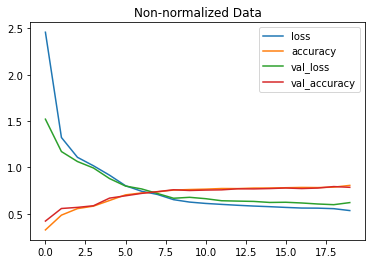

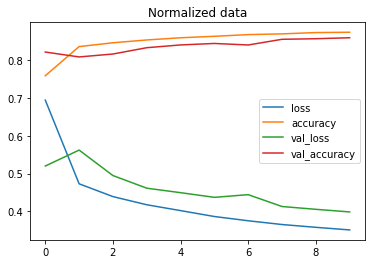

In [53]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(nonorm_history8.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history9.history).plot(title="Normalized data");

# Finding ideal learning rate

In [54]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=input_shape),
                               tf.keras.layers.Dense(16, activation='relu'),
                               tf.keras.layers.Dense(8, activation='relu'),
                               tf.keras.layers.Dense(output_shape, activation=tf.keras.activations.softmax)
])

model_10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), #label must be one-hot encoded, if not u can use SparseCategoricalEntropy
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'])

#scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * (10**(epoch/20)))

lr_history = model_10.fit(train_data_norm,
            train_labels, 
            epochs = 40, 
            validation_data=(test_data_norm, test_labels),
            callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9972 - accuracy: 0.6422 - val_loss: 0.5199 - val_accuracy: 0.8210
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4795 - accuracy: 0.8325 - val_loss: 0.5630 - val_accuracy: 0.8094
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4469 - accuracy: 0.8408 - val_loss: 0.4975 - val_accuracy: 0.8150
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4171 - accuracy: 0.8532 - val_loss: 0.4466 - val_accuracy: 0.8388
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4056 - accuracy: 0.8554 - val_loss: 0.4622 - val_accuracy: 0.8346
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3898 - accuracy: 0.8603 - val_loss: 0.4745 - val_accuracy: 0.8306
Epoch 7/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3731 - accuracy: 0.8667 - val_loss: 0.4490 - val_accuracy:

Text(0.5, 1.0, 'Finding Learning Rate')

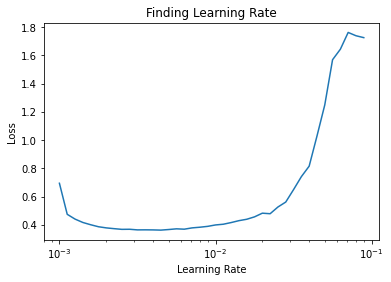

In [57]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, lr_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding Learning Rate')

our model_9 already ideal fit

# Evaluate the model

In [58]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def makeconfusionmatrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure, make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # make label
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

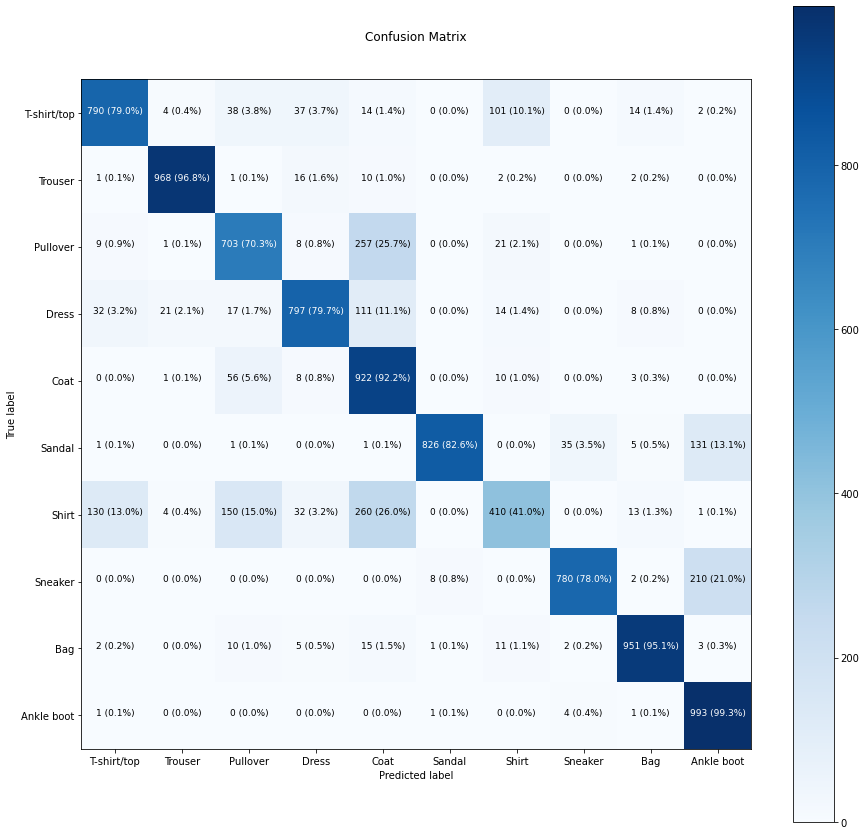

In [64]:
makeconfusionmatrix(test_labels, model_9.predict(test_data).argmax(axis=1), classes=class_names, figsize=(15,15), text_size=9)

In [66]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):

  # Set random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

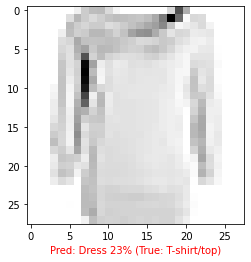

In [68]:
plot_random_image(model=model_10, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

the model mixed up items with similar shape, T-shirt, pullover and tops, sneaker with ankle boots, they both shoes

# What patterns is our model learning?

In [69]:
model_10.layers

In [70]:
model_10.layers[1]

In [71]:
weights, biases = model_10.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.02850299,  1.3202357 ,  8.6792    , ...,  2.2166362 ,
          0.25483358,  5.508636  ],
        [ 1.1849307 ,  6.888493  ,  6.662541  , ...,  2.3890529 ,
          3.0043948 , -6.4423532 ],
        [-2.1054242 ,  2.8680928 ,  2.2436514 , ...,  3.3535082 ,
         -2.4718974 , -8.628193  ],
        ...,
        [ 3.2582405 , -4.699002  ,  1.9588029 , ...,  1.3982128 ,
          1.1663538 , -6.5800796 ],
        [ 2.262961  ,  1.3977034 ,  0.66604745, ...,  3.6547122 ,
         -3.3301635 , -9.820982  ],
        [ 0.3068918 ,  0.05351748,  4.930547  , ...,  2.5504632 ,
          9.040919  , -8.812649  ]], dtype=float32), (784, 16))

In [74]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 11.619957 , -11.038978 ,   7.6614265,   8.622193 ,   0.7568828,
         -4.052759 ,   3.6507268,  -3.815234 ,  10.235767 , -12.5121355,
          1.3007272,  -0.438599 ,  -4.739478 , -14.288768 ,   7.4842405,
         -8.859812 ], dtype=float32), (16,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the bias_initializer parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [75]:
# Can now calculate the number of paramters in our model
model_10.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_67 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_68 (Dense)             (None, 10)                90        
Total params: 12,786
Trainable params: 12,786
Non-trainable params: 0
_________________________________________________________________


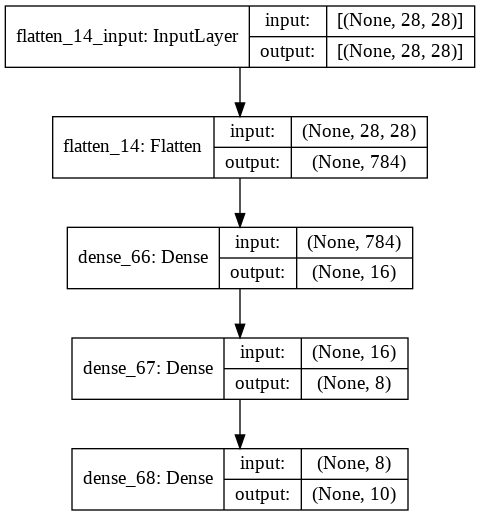

In [77]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_10, show_shapes=True)

# How a model learns (in brief)
whats going under the hood? how does the model learn?

by updating biases and weights matrices every epochs.

by comparing the pattern it learnned between the data and label to the actual label, prediction vs actual data

if weight and bias doesnt result in desireable decrease in loss function, the optimizer will direct the model to update it pattern, using the real label as reference, this process called backpropagation

data and labels pass through a model (forward pass) and it attempts to learn the relationship between the data and labels, then going back (backward pass) and tweaking weights and bias to better represent the data.